<h2 style='color:blue'> Neighborhoods in London and Singapore </h2>

<h3 style ="color:blue">  Presentation </h3>
<p style='text-align: justify;font-family:Arial;'>A financial center, or a financial hub, refers to a city with a strategic location, leading financial institutions, reputed stock exchanges, a dense concentration of public and private banks and trading and insurance companies. In addition, these hubs are equipped with first-class infrastructure, communications, and commercial systems, and there is a transparent and sound legal and regulatory regime backed by a stable political system. Such cities are favorable destinations for professionals because of the high living standards they offer along with immense growth opportunities. </p>

<p style='text-align: justify; font-family:Arial;'> Since the middle ages, London has been one of the most prominent trade and business centers. The city is one of the most visited places on earth and is among the most preferred places to do business.
From a business perspective, Singapore's attractiveness lies in its transparent and sound legal framework complementing its economic and political stability. The small island located in the Southeast Asia region has emerged as one of the Four Asian Tigers and established itself as a major financial center. 
These two cities belong to different continent. One to Europe and the second to Asia. In our study we will compare neighborhood of both cities and tell how similar or dissimilar they are. </p>


<h3 style='color:blue'> Data </h3>

<span style='font-size:16px;font-family:Arial;'>To Accomplish this study, we will use foursquare location to get all venues of each city. We will categorize venue on each city to see how theses city are similar or dissimilar. We will need:
    
1. London’s geolocation,
2. Singapore geolocation,
3. Foursquare venues of each city. Each venue will be categorized and shown in a map. 
4. Venue name, description and category
    
We will take the most frequent venue category in each scity such as restaurant, park, coffee, shopping. 
We will filter our neighborhood data frame to theses category venue and show in a map each category with a different color using folium. </span>


<h3 style="color:blue">Methodology</h3>

<p style='font-family:Arial;'>After creating a foursquare account and getting our credentials we have to get London center geolocation and Singapore center geolocation. We will put this  in two dictionaries with other information like area.</p>
<p style='font-family:Arial;'> The second step is to get neighborhood for each city using foursquare APIs. The result we be convert as a data frame showing all venues information’s for each city. 
London data </p>


<p style='font-family:Arial;'> Let's start by import required libraries such as pandas, folium numpy for manipulating data </p>

In [50]:
import requests
import pandas as pd
import numpy as np 
from geopy.geocoders import Nominatim 
from pandas.io.json import json_normalize
import folium
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


<p style='font-family:Arial;'> We will use foursquare location to get the venues of each both cities ( london and singapore). For that we have to define our client ID, client secret, version and we will set our limit to 10000 to get the maximum of venues as possible </p>

In [4]:
CLIENT_ID = '2H10FWYDICOAXYJG4L12GWGGHEEONBL4QO2PWWQTJPBIKR2N' 
CLIENT_SECRET = 'P5FBRASTRXIXJFO35XSDXELN0AAUSO2TV03WDMMSWAZXRB35' 
VERSION = '20180604'
LIMIT = 10000

<p style='font-family:Arial;'>The next step is create a dictionnary for each cities. Each dictionnary will contains latitute, longitude and area of ach cities </p> 
<p style='font-family:Arial;'> We will use area data to cover all area of city when using foursquare API</p>

In [5]:
london_geo = {'lat':51.509865, 'lng':-0.118092,'area': 1572}
singapor_geo = {'lat':1.290270, 'lng':103.851959, 'area': 721.5}
area = 105.4

<p style='font-family:Arial;'> Now let set the foursquare url for each cities that call the api and retrieve venues </p>

In [6]:
url_london = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, london_geo['lat'], london_geo['lng'], VERSION, london_geo['area'], LIMIT)
url_singapor = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, singapor_geo['lat'], singapor_geo['lng'], VERSION, singapor_geo['area'], LIMIT)

<p style='font-family:Arial;'> Call the url with the requests library and get the result as json format</p>


In [7]:
london_result = requests.get(url_london).json()
singapor_result = requests.get(url_singapor).json()

<p style='font-family:Arial;'>When getting the response at this step we just need to retrieve the venues information of each city.</p> 


In [8]:
london_venues = [venues['venue'] for venues in london_result['response']['groups'][0]['items']]
singapor_venues = [venues['venue'] for venues in singapor_result['response']['groups'][0]['items']]

<p style='font-family:Arial;'> Now we have our result let transform it in a pandas dataframe with json_normalize method </p>

In [9]:
df_london = json_normalize(london_venues)
df_london.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,id,name,categories,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,...,location.country,location.formattedAddress,photos.count,photos.groups,venuePage.id,location.crossStreet,location.neighborhood,events.count,events.summary,events.items
0,4ac518cff964a52063a620e3,Somerset House,"[{'id': '4bf58dd8d48988d171941735', 'name': 'E...",Strand,51.510786,-0.117899,"[{'label': 'display', 'lat': 51.51078575130956...",103,WC2R 1LA,GB,...,United Kingdom,"[Strand, London, Greater London, WC2R 1LA, Uni...",0,[],45884508,NaN,NaN,NaN,NaN,NaN
1,4c6950702c29d13ab5d50a41,The Savoy Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",Strand,51.510448,-0.120876,"[{'label': 'display', 'lat': 51.51044776531987...",203,WC2R 0EU,GB,...,United Kingdom,"[Strand (Savoy St), London, Greater London, WC...",0,[],NaN,Savoy St,NaN,NaN,NaN,NaN
2,4bad083df964a52078263be3,Lyceum Theatre,"[{'id': '4bf58dd8d48988d137941735', 'name': 'T...",21 Wellington St,51.511598,-0.119785,"[{'label': 'display', 'lat': 51.51159771114791...",225,WC2E 7DA,GB,...,United Kingdom,"[21 Wellington St, London, Greater London, WC2...",0,[],42261411,NaN,NaN,NaN,NaN,NaN
3,4b9e3908f964a520f6d236e3,Victoria Embankment Gardens,"[{'id': '4bf58dd8d48988d15a941735', 'name': 'G...",Victoria Embankment,51.508135,-0.122079,"[{'label': 'display', 'lat': 51.50813522335623...",336,NaN,GB,...,United Kingdom,[Victoria Embankment (btwn Villiers St & Savoy...,0,[],53401191,btwn Villiers St & Savoy St,NaN,NaN,NaN,NaN
4,4ac7a2caf964a520adb820e3,National Theatre,"[{'id': '4bf58dd8d48988d137941735', 'name': 'T...",Upper Ground,51.507376,-0.114793,"[{'label': 'display', 'lat': 51.50737580946016...",359,SE1 9PX,GB,...,United Kingdom,"[Upper Ground, London, Greater London, SE1 9PX...",0,[],NaN,NaN,South Ban,NaN,NaN,NaN


In [10]:
df_singapor = json_normalize(singapor_venues)
df_singapor.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,id,name,categories,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.country,location.formattedAddress,photos.count,photos.groups,location.crossStreet,venuePage.id,location.neighborhood,location.state
0,4d438c6514aa8cfa743d5c3d,National Gal­lery Singa­pore,"[{'id': '4bf58dd8d48988d1e2931735', 'name': 'A...",1 St. Andrew's Road,1.290740,103.851548,"[{'label': 'display', 'lat': 1.290739591334198...",69,178957,SG,Singapore,Singapore,"[1 St. Andrew's Road, 178957, Singapore]",0,[],NaN,NaN,NaN,NaN
1,4b058810f964a52036af22e3,Esplanade Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",Connaught Dr.,1.288968,103.853580,"[{'label': 'display', 'lat': 1.288967570835395...",231,179558,SG,Singapore,Singapore,"[Connaught Dr. (Opp Padang & City Hall), 17955...",0,[],Opp Padang & City Hall,NaN,NaN,NaN
2,4e7f3d04f5b97a346f1afe04,Singapore F1 GP: Padang Stage,"[{'id': '5032792091d4c4b30a586d5c', 'name': 'C...",Marina Bay Street Circuit,1.290697,103.853297,"[{'label': 'display', 'lat': 1.290696620128562...",156,NaN,SG,Singapore,Singapore,"[Marina Bay Street Circuit (Zone 4), Singapore]",0,[],Zone 4,NaN,NaN,NaN
3,4f0bbc70e4b0baf830387ef5,The Oval @ Singapore Cricket Club Pavilion,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",Connaught Dr,1.289006,103.852438,"[{'label': 'display', 'lat': 1.289006326179918...",150,NaN,SG,Singapore,Singapore,"[Connaught Dr, Singapore]",0,[],NaN,NaN,NaN,NaN
4,5630c035498ed421ed0b2afc,Odette Restaurant,"[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...","#01-04, National Gal­lery Singa­pore",1.289679,103.851691,"[{'label': 'display', 'lat': 1.289679438856723...",72,178957,SG,Singapore,Singapore,"[#01-04, National Gal­lery Singa­pore (1 St. A...",0,[],1 St. Andrew's Road,NaN,NaN,NaN


In [11]:
df_london.shape

(100, 22)

In [12]:
df_singapor.shape

(100, 19)

<h4 style='color:blue'>Data cleaning</h4>

<p style='font-family:Arial;'>Cleaning our data is a very important step as we need only some informations from the results we have</p>
<p style='font-family:Arial;'>Another important point is that categories is in a list of dict format in our resutlt and we just want a text format</p>



<p style='font-family:Arial;'> the fonction below we transform the category column in each dataframe and transform it to a readable text format </p> 

In [13]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

<p style='font-family:Arial;'> So let's apply the function to our two dataframe </p> 

In [14]:
df_london['categories'] = df_london.apply(get_category_type, axis=1)

In [15]:
df_singapor['categories'] = df_singapor.apply(get_category_type, axis=1)

<p style='font-family:Arial;'> We see that the categories column is now clean and readable </p> 

In [16]:
df_london.head()

,id,name,categories,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,...,location.country,location.formattedAddress,photos.count,photos.groups,venuePage.id,location.crossStreet,location.neighborhood,events.count,events.summary,events.items
0,4ac518cff964a52063a620e3,Somerset House,Event Space,Strand,51.510786,-0.117899,"[{'label': 'display', 'lat': 51.51078575130956...",103,WC2R 1LA,GB,...,United Kingdom,"[Strand, London, Greater London, WC2R 1LA, Uni...",0,[],45884508,NaN,NaN,NaN,NaN,NaN
1,4c6950702c29d13ab5d50a41,The Savoy Hotel,Hotel,Strand,51.510448,-0.120876,"[{'label': 'display', 'lat': 51.51044776531987...",203,WC2R 0EU,GB,...,United Kingdom,"[Strand (Savoy St), London, Greater London, WC...",0,[],NaN,Savoy St,NaN,NaN,NaN,NaN
2,4bad083df964a52078263be3,Lyceum Theatre,Theater,21 Wellington St,51.511598,-0.119785,"[{'label': 'display', 'lat': 51.51159771114791...",225,WC2E 7DA,GB,...,United Kingdom,"[21 Wellington St, London, Greater London, WC2...",0,[],42261411,NaN,NaN,NaN,NaN,NaN
3,4b9e3908f964a520f6d236e3,Victoria Embankment Gardens,Garden,Victoria Embankment,51.508135,-0.122079,"[{'label': 'display', 'lat': 51.50813522335623...",336,NaN,GB,...,United Kingdom,[Victoria Embankment (btwn Villiers St & Savoy...,0,[],53401191,btwn Villiers St & Savoy St,NaN,NaN,NaN,NaN
4,4ac7a2caf964a520adb820e3,National Theatre,Theater,Upper Ground,51.507376,-0.114793,"[{'label': 'display', 'lat': 51.50737580946016...",359,SE1 9PX,GB,...,United Kingdom,"[Upper Ground, London, Greater London, SE1 9PX...",0,[],NaN,NaN,South Ban,NaN,NaN,NaN


In [17]:
df_singapor.head()

,id,name,categories,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.country,location.formattedAddress,photos.count,photos.groups,location.crossStreet,venuePage.id,location.neighborhood,location.state
0,4d438c6514aa8cfa743d5c3d,National Gal­lery Singa­pore,Art Gallery,1 St. Andrew's Road,1.290740,103.851548,"[{'label': 'display', 'lat': 1.290739591334198...",69,178957,SG,Singapore,Singapore,"[1 St. Andrew's Road, 178957, Singapore]",0,[],NaN,NaN,NaN,NaN
1,4b058810f964a52036af22e3,Esplanade Park,Park,Connaught Dr.,1.288968,103.853580,"[{'label': 'display', 'lat': 1.288967570835395...",231,179558,SG,Singapore,Singapore,"[Connaught Dr. (Opp Padang & City Hall), 17955...",0,[],Opp Padang & City Hall,NaN,NaN,NaN
2,4e7f3d04f5b97a346f1afe04,Singapore F1 GP: Padang Stage,Concert Hall,Marina Bay Street Circuit,1.290697,103.853297,"[{'label': 'display', 'lat': 1.290696620128562...",156,NaN,SG,Singapore,Singapore,"[Marina Bay Street Circuit (Zone 4), Singapore]",0,[],Zone 4,NaN,NaN,NaN
3,4f0bbc70e4b0baf830387ef5,The Oval @ Singapore Cricket Club Pavilion,Restaurant,Connaught Dr,1.289006,103.852438,"[{'label': 'display', 'lat': 1.289006326179918...",150,NaN,SG,Singapore,Singapore,"[Connaught Dr, Singapore]",0,[],NaN,NaN,NaN,NaN
4,5630c035498ed421ed0b2afc,Odette Restaurant,French Restaurant,"#01-04, National Gal­lery Singa­pore",1.289679,103.851691,"[{'label': 'display', 'lat': 1.289679438856723...",72,178957,SG,Singapore,Singapore,"[#01-04, National Gal­lery Singa­pore (1 St. A...",0,[],1 St. Andrew's Road,NaN,NaN,NaN


<p style='font-family:Arial;'> Now we have clean categories the next is to define two variable </p>
<p style='font-family:Arial;'> the first on named filtered_columns is to limit out dataframe for only needed columns. We will use only the name,categories, latitude and longitude </p>
<p style='font-family:Arial;'> the second variable named colors_categories is a dictionnary with needed categories with corresonding colors. these colors will be used when showing the map</p>

In [18]:
filtered_columns = ['name', 'categories', 'location.lat', 'location.lng']
colors_categories = {"restaurant":"green", "park": "blue", "coffee": "pink", "shopping": "red"}

<p style='font-family:Arial;'> Then we apply the filtered columns to our dataframes and we will limit the dataframe to only categories venues we have choosen . the others categories that did not match will be removed.</p>

In [19]:
import re
df_filtered_london = df_london[filtered_columns]
df_filtered_london.rename(columns={'location.lat': 'lat', 'location.lng': 'lng'}, inplace=True)
df_filtered_london = df_filtered_london[df_filtered_london.stack().str.contains('|'.join(colors_categories.keys()),flags=re.IGNORECASE).any(level=0)]

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<p style='font-family:Arial;'>Let make the same stuff above to our singapor data </p> 

In [20]:
df_filtered_singapor = df_singapor[filtered_columns]
df_filtered_singapor.rename(columns={'location.lat': 'lat', 'location.lng': 'lng'}, inplace=True)
df_filtered_singapor = df_filtered_singapor[df_filtered_singapor.stack().str.contains('|'.join(colors_categories.keys()),flags=re.IGNORECASE).any(level=0)]

<p style='font-family:Arial;'> This fonction below will return corresponding color for each categories that we have defined above </p>

In [21]:
def get_color_categories(categories):
    categories = categories.lower()
    for cat in colors_categories.keys():
        if cat in categories:
            return colors_categories[cat]
    return "blue"

In [22]:
df_filtered_singapor.head()

,name,categories,lat,lng
1,Esplanade Park,Park,1.288968,103.853580
3,The Oval @ Singapore Cricket Club Pavilion,Restaurant,1.289006,103.852438
4,Odette Restaurant,French Restaurant,1.289679,103.851691
7,Funan,Shopping Mall,1.291333,103.850121
15,PPP Coffee,Coffee Shop,1.291628,103.849741


In [23]:
df_filtered_london.head()

,name,categories,lat,lng
6,SUSHISAMBA,Sushi Restaurant,51.512232,-0.122371
7,Covent Garden Market,Shopping Plaza,51.511977,-0.122799
8,Lundenwic,Coffee Shop,51.512823,-0.118343
13,Sticks'n'Sushi,Sushi Restaurant,51.511038,-0.123655
15,Southbank Skate Park,Skate Park,51.506911,-0.116636


### Displaying map and result

In [24]:
map_london = folium.Map(location=[london_geo['lat'], london_geo['lng']], zoom_start=14)

# add markers to map
for lat, lng, label,categorie in zip(df_filtered_london['lat'], df_filtered_london['lng'], 
                                     df_filtered_london['name'],df_filtered_london['categories']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color= get_color_categories(categorie),
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
map_london

In [25]:
map_singapor = folium.Map(location=[singapor_geo['lat'], singapor_geo['lng']], zoom_start=14)

# add markers to map
for lat, lng, label,categorie in zip(df_filtered_singapor['lat'], df_filtered_singapor['lng'], 
                                     df_filtered_singapor['name'],df_filtered_singapor['categories']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color= get_color_categories(categorie),
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_singapor)  
map_singapor

<h3 style='color:blue'>Result </h3>

<p style='font-family:Arial;'> Let define a function that return the total result we have in a given categories </p>

In [39]:
def total_categories(df, city):
    result = {}
    for categories in colors_categories.keys():
        total = df.categories.str.contains(categories, flags=re.IGNORECASE).sum()
        result[categories] = total
    return result
        

In [ ]:
<p style='font-family:Arial;'> We apply the total_cetagories function to our da

In [40]:
result_london = total_categories(df_filtered_london, "london")
result_london

{'restaurant': 13, 'park': 2, 'coffee': 3, 'shopping': 1}

In [41]:
result_singapore = total_categories(df_filtered_singapor, "singapor")
result_singapore

{'restaurant': 26, 'park': 1, 'coffee': 2, 'shopping': 4}

In [42]:
result = []
for key in result_london.keys():
    result.append({'categories': key, 'total_london': result_london[key], 'total_singapore':result_singapore[key]})
result

[{'categories': 'restaurant', 'total_london': 13, 'total_singapore': 26},
 {'categories': 'park', 'total_london': 2, 'total_singapore': 1},
 {'categories': 'coffee', 'total_london': 3, 'total_singapore': 2},
 {'categories': 'shopping', 'total_london': 1, 'total_singapore': 4}]

In [46]:
df_categories = pd.DataFrame(result)
df_categories.set_index("categories",inplace=True)
df_categories

,total_london,total_singapore
categories,,
restaurant,13,26
park,2,1
coffee,3,2
shopping,1,4


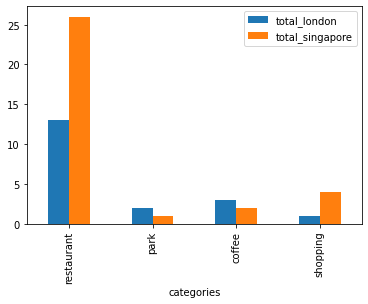

In [51]:
df_categories.plot.bar();

<h3 style=color:blue> Discussion </h3> 

<p style='text-align:justify;font-family:Arial;'>We can easily see that in London we have more restaurant and variety in the city. But in Singapore we have more shopping center and coffee shop than London. We can resume this result that Singapore is a best place for making shopping than London but for eating London is a good city. If someone want to open a restaurant, we can say that London is a good place.</p>

<h3 style=color:blue> Conclusion </h3> 

<p style='text-align:justify'>This report attempts to make a comparison of two big city using some king of categories. We can use more data to make a better comparison and also predict where is the place to make a business in food or in clothes. If someone want to start a business in these two cities in food or an clothes in these two cities this report can be a good start.</p>